In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_curve, f1_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./Data/Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [7]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} unique values")

customerID: 7043 unique values
gender: 2 unique values
Partner: 2 unique values
Dependents: 2 unique values
PhoneService: 2 unique values
MultipleLines: 3 unique values
InternetService: 3 unique values
OnlineSecurity: 3 unique values
OnlineBackup: 3 unique values
DeviceProtection: 3 unique values
TechSupport: 3 unique values
StreamingTV: 3 unique values
StreamingMovies: 3 unique values
Contract: 3 unique values
PaperlessBilling: 2 unique values
PaymentMethod: 4 unique values
TotalCharges: 6531 unique values
Churn: 2 unique values


In [8]:
df['MultipleLines'].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [9]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [10]:
df['OnlineSecurity'].value_counts()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

In [11]:
df['OnlineBackup'].value_counts()

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

In [12]:
df['DeviceProtection'].value_counts()

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

In [13]:
df[['TechSupport']].value_counts()

TechSupport        
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

In [14]:
df['StreamingTV'].value_counts()

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

In [15]:
df['StreamingMovies'].value_counts()

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

In [16]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [17]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [18]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [19]:
df['TotalCharges'].isna().sum() 

11

In [20]:
df = df.dropna(subset=['TotalCharges'])


In [21]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
print(cat_cols)


['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [22]:
# Drop customerID
df.drop('customerID', axis=1, inplace=True)

In [23]:
# Convert TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])

In [24]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
# Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [26]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [27]:
df['PaymentMethod'].value_counts()

PaymentMethod
2    2365
3    1604
0    1542
1    1521
Name: count, dtype: int64

In [28]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.940557,0.872582,0.789249,0.905859,0.903868,0.796359,0.984926,0.992890,0.688567,0.592719,1.573237,64.798208,2283.300441,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.948627,0.737271,0.859962,0.880394,0.880178,0.861674,0.885285,0.885385,0.832934,0.491363,1.067504,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500,401.450000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [29]:
churn_counts = df['Churn'].value_counts()
df['Churn'].value_counts(normalize=True)


Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64

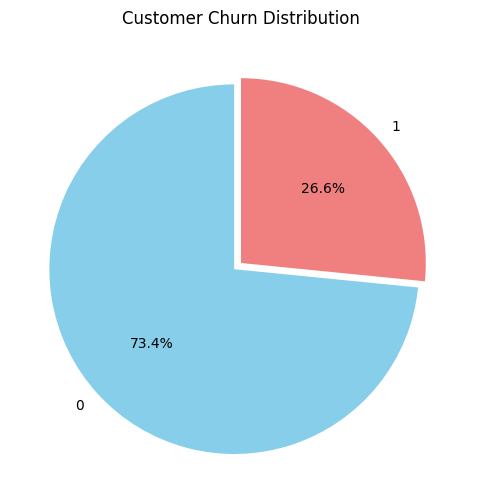

In [30]:
# Pie chart
plt.figure(figsize=(6,6))
plt.pie(churn_counts, 
        labels=churn_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['skyblue', 'lightcoral'],
        explode=(0.05, 0))  # Slightly separate slices for emphasis

plt.title("Customer Churn Distribution")
plt.show()


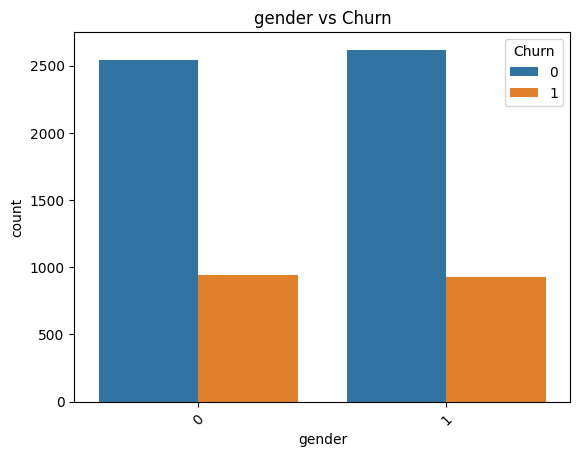

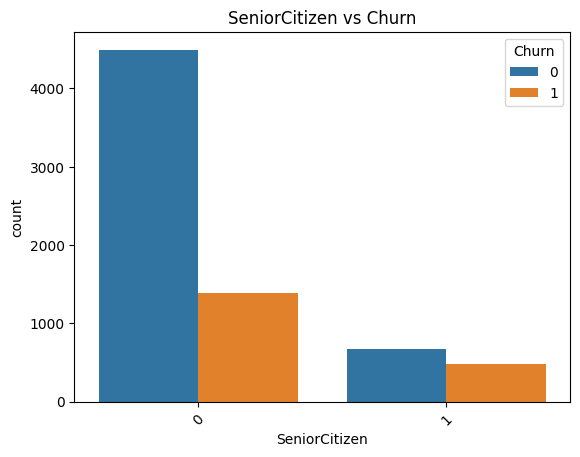

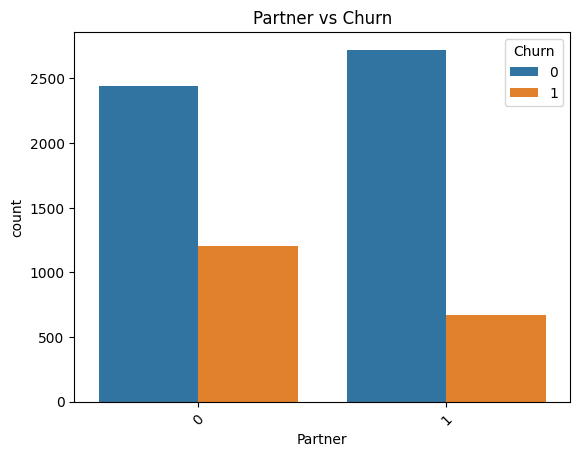

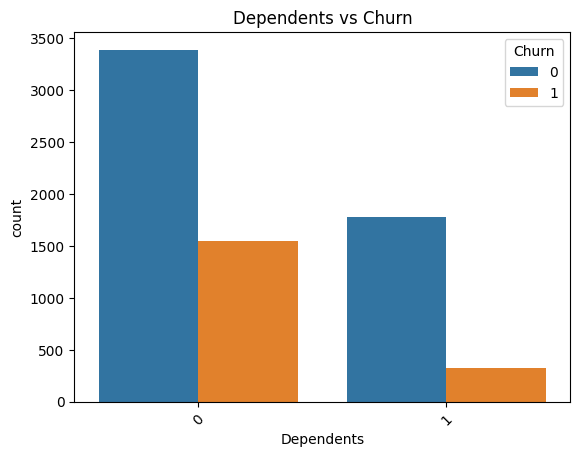

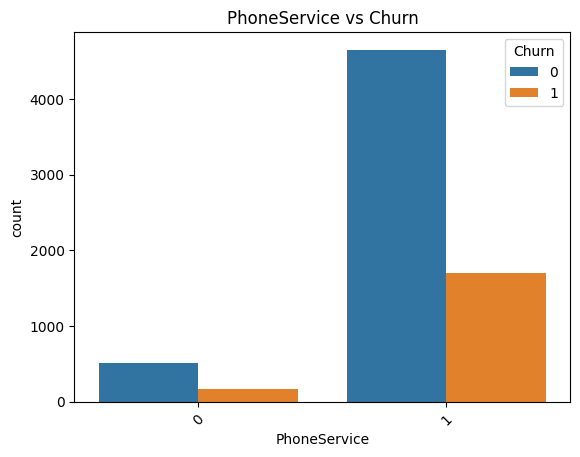

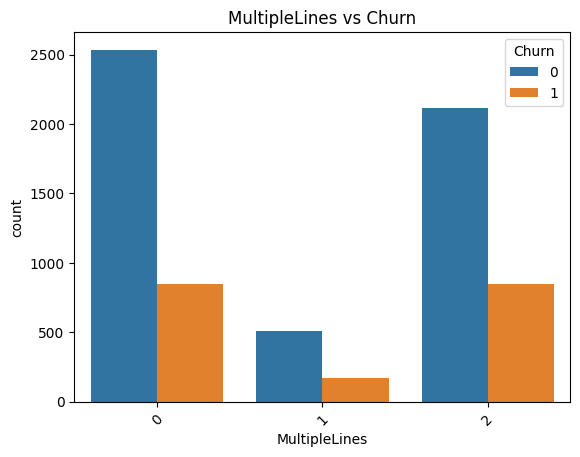

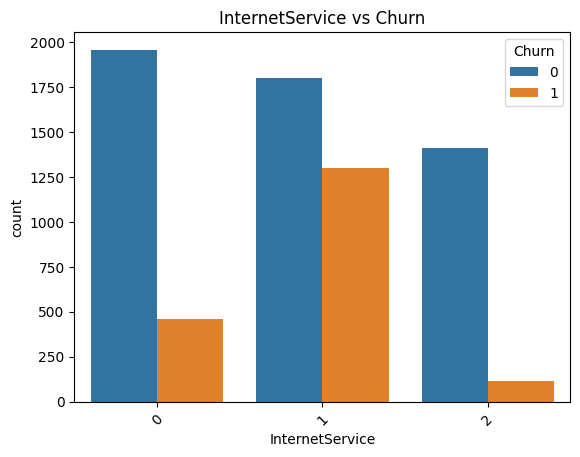

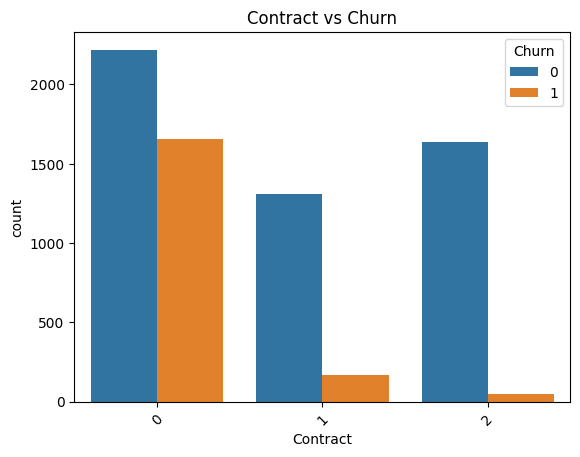

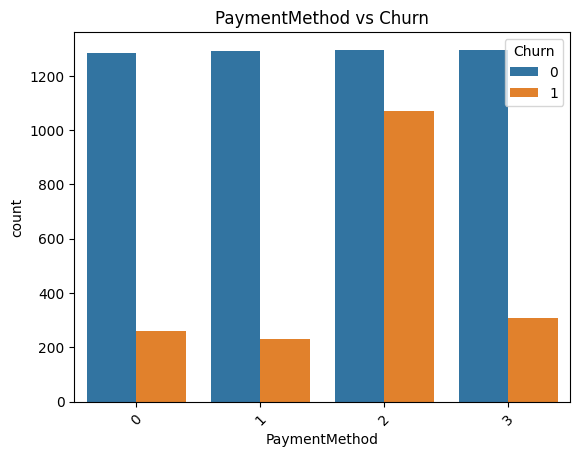

In [31]:
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                    'PhoneService', 'MultipleLines', 'InternetService', 
                    'Contract', 'PaymentMethod']

for col in categorical_cols:
    sns.countplot(data=df, x=col, hue='Churn')
    plt.xticks(rotation=45)
    plt.title(f'{col} vs Churn')
    plt.show()


In [93]:
def plot_histogram(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.histplot(df[column_name], kde=True)
  plt.title(f"Distribution of {column_name}")

  # calculate the mean and median values for the columns
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  # add vertical lines for mean and median
  plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
  plt.axvline(col_median, color="green", linestyle="-", label="Median")

  plt.legend()

  plt.show()

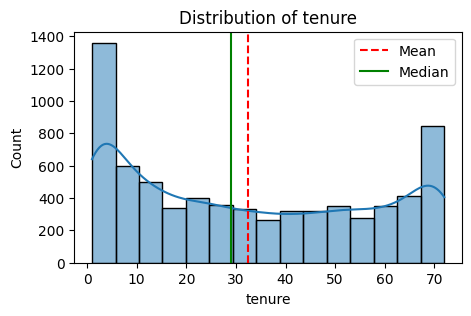

In [94]:
plot_histogram(df, "tenure")

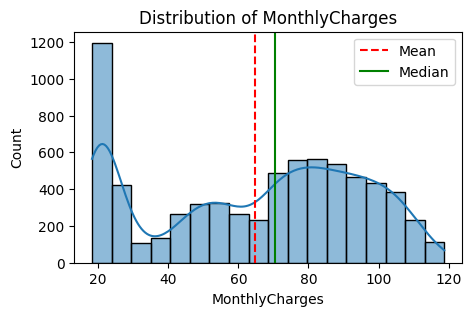

In [95]:
plot_histogram(df, "MonthlyCharges")

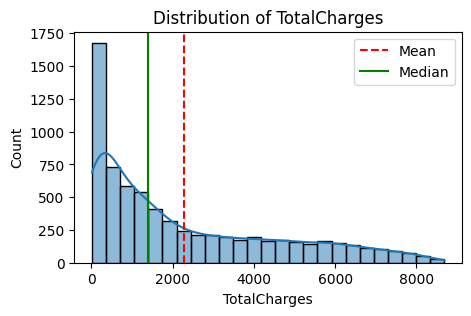

In [96]:
plot_histogram(df, "TotalCharges")

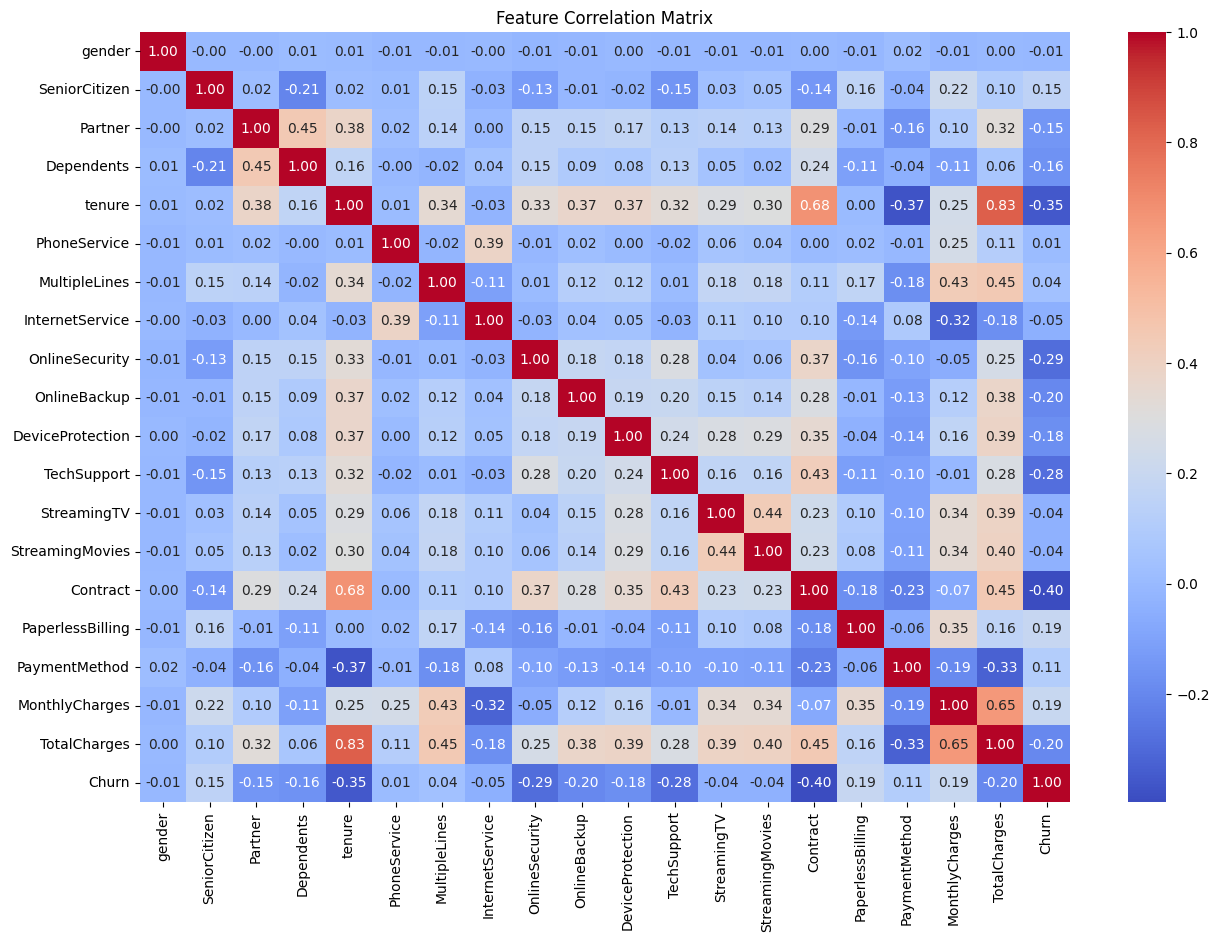

In [32]:
plt.figure(figsize=(15,10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


In [33]:
from sklearn.ensemble import RandomForestClassifier

All_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
                    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup','DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 
                    'Contract','PaperlessBilling','PaymentMethod','MonthlyCharges', 'TotalCharges']

target_col = 'Churn'

X = df[All_cols]
y= df[target_col]

model = RandomForestClassifier()
model.fit(X, y)
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feature_importance)


TotalCharges        0.189853
MonthlyCharges      0.179047
tenure              0.155401
Contract            0.085285
PaymentMethod       0.050636
OnlineSecurity      0.045667
TechSupport         0.041910
gender              0.027779
OnlineBackup        0.026687
InternetService     0.026232
PaperlessBilling    0.024855
DeviceProtection    0.024365
Partner             0.022861
MultipleLines       0.021966
SeniorCitizen       0.020435
Dependents          0.018379
StreamingMovies     0.017153
StreamingTV         0.016615
PhoneService        0.004875
dtype: float64


In [34]:
All_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure','PhoneService', 'MultipleLines', 
            'InternetService', 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 
            'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling','PaymentMethod','MonthlyCharges', 'TotalCharges']

selected_15 = [
    'TotalCharges', 'MonthlyCharges', 'tenure', 'Contract',
    'OnlineSecurity', 'PaymentMethod', 'TechSupport',
    'InternetService', 'gender', 'PaperlessBilling',
    'DeviceProtection', 'OnlineBackup', 'Partner'
]
selected_7 = [
    'TotalCharges', 'MonthlyCharges', 'tenure', 'Contract',
    'OnlineSecurity', 'PaymentMethod', 'TechSupport',
]



In [35]:
split_index = int(len(df) * 0.8)

# Step 3: Split into training and testing sets
train_df = df.iloc[:split_index].reset_index(drop=True)
test_df = df.iloc[split_index:].reset_index(drop=True)

# Check sizes
print(f"Train set size: {len(train_df)}")
print(f"Test set size: {len(test_df)}")

Train set size: 5625
Test set size: 1407


In [72]:
# Define features and target
selected_15 = [
    'TotalCharges', 'MonthlyCharges', 'tenure', 'Contract',
    'OnlineSecurity', 'PaymentMethod', 'TechSupport',
    'InternetService', 'gender', 'PaperlessBilling',
    'DeviceProtection', 'OnlineBackup', 'Partner'
]
target = 'Churn'

# Separate features ad target
X_train, y_train = train_df[selected_15], train_df[target]

# Apply SMOTE + Tomek separately to training and testing data
smote_tomek = SMOTETomek(random_state=42)

X_train_res, y_train_res = smote_tomek.fit_resample(X_train, y_train)

# Convert back to DataFrame
train1_15 = pd.DataFrame(X_train_res, columns=selected_15)
train1_15[target] = y_train_res

# Save the balanced dataset as a CSV file
train1_15.to_csv("./Data/balanced_train_15.csv", index=False)

print("Balanced train datasets for train1_15 saved successfully!")


Balanced train datasets for train1_15 saved successfully!


In [73]:
train1_15["Churn"].value_counts()

Churn
0    3800
1    3800
Name: count, dtype: int64

In [74]:
# Function to train and evaluate a model
def train_model(X_train, y_train, X_test , y_test):
    # Train a Random Forest model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Get probability scores instead of direct predictions
    y_probs = model.predict_proba(X_test)[:, 1]
    
    # Compute precision-recall curve
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
    
    # Find the best threshold for max F1-score
    f1_scores = (2 * precisions * recalls) / (precisions + recalls + 1e-9)  # Avoid division by zero
    best_threshold = thresholds[f1_scores.argmax()]
    
    print(f"Optimal Threshold for F1-score: {best_threshold:.4f}")
    
    # Apply new threshold
    y_pred_adjusted = (y_probs >= best_threshold).astype(int)
    
    # Evaluate
    print("Accuracy:", accuracy_score(y_test, y_pred_adjusted))
    print(confusion_matrix(y_test, y_pred_adjusted))
    print(classification_report(y_test, y_pred_adjusted))
    
    
    return model, best_threshold

# Define feature matrix
X_train = train1_15[selected_15]
y_train = train1_15['Churn']
X_test = test_df[selected_15]
y_test = test_df['Churn']

Model_F_15, best_threshold = train_model(X_train, y_train, X_test , y_test)

Optimal Threshold for F1-score: 0.4300
Accuracy: 0.7746979388770433
[[828 198]
 [119 262]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1026
           1       0.57      0.69      0.62       381

    accuracy                           0.77      1407
   macro avg       0.72      0.75      0.73      1407
weighted avg       0.79      0.77      0.78      1407



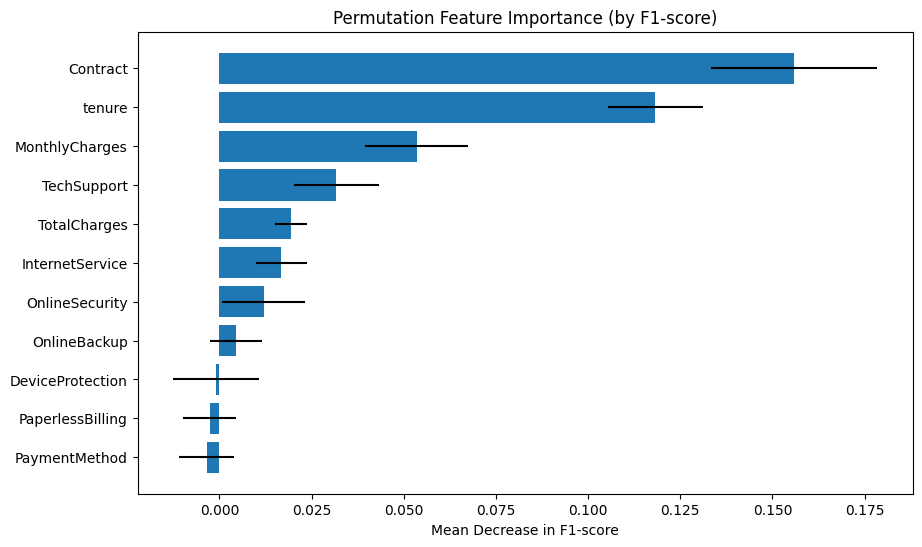

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

selected_15 = [
    'TotalCharges', 'MonthlyCharges', 'tenure', 'Contract',
    'OnlineSecurity', 'PaymentMethod', 'TechSupport',
    'InternetService', 'gender', 'PaperlessBilling',
    'DeviceProtection', 'OnlineBackup', 'Partner'
]
# Get permutation importance
result = permutation_importance(Model_F_15, X_test, y_test, scoring='f1', n_repeats=10, random_state=42)

# Convert to DataFrame
perm_importance = pd.DataFrame({
    'feature': selected_15,
    'importance_mean': result.importances_mean,
    'importance_std': result.importances_std
}).sort_values(by='importance_mean', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(perm_importance['feature'], perm_importance['importance_mean'], xerr=perm_importance['importance_std'])
plt.gca().invert_yaxis()
plt.title('Permutation Feature Importance (by F1-score)')
plt.xlabel('Mean Decrease in F1-score')
plt.show()


In [39]:
# Define features and target
selected_7 = [
    'TotalCharges', 'MonthlyCharges', 'tenure', 'Contract',
    'OnlineSecurity', 'PaymentMethod', 'TechSupport',
]
target = 'Churn'

# Separate features ad target
X_train, y_train = train_df[selected_7], train_df[target]

# Apply SMOTE + Tomek separately to training and testing data
smote_tomek = SMOTETomek(random_state=42)

X_train_res, y_train_res = smote_tomek.fit_resample(X_train, y_train)

# Convert back to DataFrame
train1_7 = pd.DataFrame(X_train_res, columns=selected_7)
train1_7[target] = y_train_res

# Save the balanced dataset as a CSV file
train1_7.to_csv("./Data/balanced_train_7.csv", index=False)

print("Balanced train datasets for train1_7 saved successfully!")


Balanced train datasets for train1_7 saved successfully!


In [40]:
train1_7["Churn"].value_counts()

Churn
0    3759
1    3759
Name: count, dtype: int64

In [58]:
# Function to train and evaluate a model
def train_model(X_train, y_train, X_test , y_test):
    # Train a Random Forest model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Get probability scores instead of direct predictions
    y_probs = model.predict_proba(X_test)[:, 1]
    
    # Compute precision-recall curve
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
    
    # Find the best threshold for max F1-score
    f1_scores = (2 * precisions * recalls) / (precisions + recalls + 1e-9)  # Avoid division by zero
    best_threshold = thresholds[f1_scores.argmax()]
    
    print(f"Optimal Threshold for F1-score: {best_threshold:.4f}")
    
    # Apply new threshold
    y_pred_adjusted = (y_probs >= best_threshold).astype(int)
    
    # Evaluate
    print("Accuracy:", accuracy_score(y_test, y_pred_adjusted))
    print(confusion_matrix(y_test, y_pred_adjusted))
    print(classification_report(y_test, y_pred_adjusted))
    
    
    return model, best_threshold

# Define feature matrix
X_train = train1_7[selected_7]
y_train = train1_7['Churn']
X_test = test_df[selected_7]
y_test = test_df['Churn']

Model_F_7, best_threshold = train_model(X_train, y_train, X_test , y_test)

Optimal Threshold for F1-score: 0.2600
Accuracy: 0.7149964463397299
[[711 315]
 [ 86 295]]
              precision    recall  f1-score   support

           0       0.89      0.69      0.78      1026
           1       0.48      0.77      0.60       381

    accuracy                           0.71      1407
   macro avg       0.69      0.73      0.69      1407
weighted avg       0.78      0.71      0.73      1407



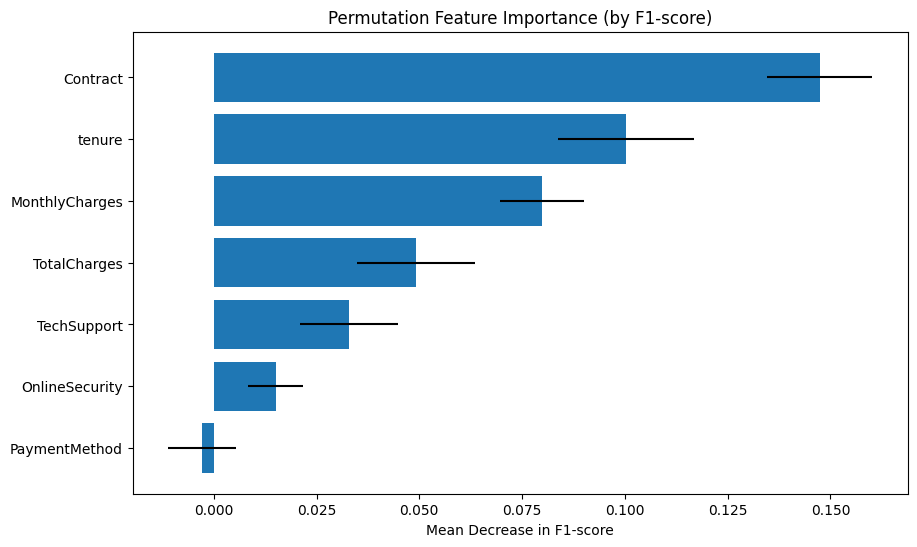

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

selected_7 = [
    'TotalCharges', 'MonthlyCharges', 'tenure', 'Contract',
    'OnlineSecurity', 'PaymentMethod', 'TechSupport',
]
# Get permutation importance
result = permutation_importance(Model_F_7, X_test, y_test, scoring='f1', n_repeats=10, random_state=42)

# Convert to DataFrame
perm_importance = pd.DataFrame({
    'feature': selected_7,
    'importance_mean': result.importances_mean,
    'importance_std': result.importances_std
}).sort_values(by='importance_mean', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(perm_importance['feature'], perm_importance['importance_mean'], xerr=perm_importance['importance_std'])
plt.gca().invert_yaxis()
plt.title('Permutation Feature Importance (by F1-score)')
plt.xlabel('Mean Decrease in F1-score')
plt.show()


In [44]:
# Define features and target
All_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure','PhoneService', 'MultipleLines', 
            'InternetService', 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 
            'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling','PaymentMethod','MonthlyCharges', 'TotalCharges']
target = 'Churn'

# Separate features ad target
X_train, y_train = train_df[All_cols], train_df[target]

# Apply SMOTE + Tomek separately to training and testing data
smote_tomek = SMOTETomek(random_state=42)

X_train_res, y_train_res = smote_tomek.fit_resample(X_train, y_train)

# Convert back to DataFrame
train1_All_cols = pd.DataFrame(X_train_res, columns=All_cols)
train1_All_cols[target] = y_train_res

# Save the balanced dataset as a CSV file
train1_All_cols.to_csv("./Data/balanced_train_All_cols.csv", index=False)

print("Balanced train datasets for train1_All_cols saved successfully!")


Balanced train datasets for train1_All_cols saved successfully!


In [62]:
# Function to train and evaluate a model
def train_model(X_train, y_train, X_test , y_test):
    # Train a Random Forest model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Get probability scores instead of direct predictions
    y_probs = model.predict_proba(X_test)[:, 1]
    
    # Compute precision-recall curve
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
    
    # Find the best threshold for max F1-score
    f1_scores = (2 * precisions * recalls) / (precisions + recalls + 1e-9)  # Avoid division by zero
    best_threshold = thresholds[f1_scores.argmax()]
    
    print(f"Optimal Threshold for F1-score: {best_threshold:.4f}")
    
    # Apply new threshold
    y_pred_adjusted = (y_probs >= best_threshold).astype(int)
    
    # Evaluate
    print("Accuracy:", accuracy_score(y_test, y_pred_adjusted))
    print(confusion_matrix(y_test, y_pred_adjusted))
    print(classification_report(y_test, y_pred_adjusted))
    
    
    return model, best_threshold

# Define feature matrix
X_train = train1_All_cols[All_cols]
y_train = train1_All_cols['Churn']
X_test = test_df[All_cols]
y_test = test_df['Churn']

Model_F_All_cols, best_threshold = train_model(X_train, y_train, X_test , y_test)

Optimal Threshold for F1-score: 0.3600
Accuracy: 0.7619047619047619
[[792 234]
 [101 280]]
              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1026
           1       0.54      0.73      0.63       381

    accuracy                           0.76      1407
   macro avg       0.72      0.75      0.73      1407
weighted avg       0.79      0.76      0.77      1407



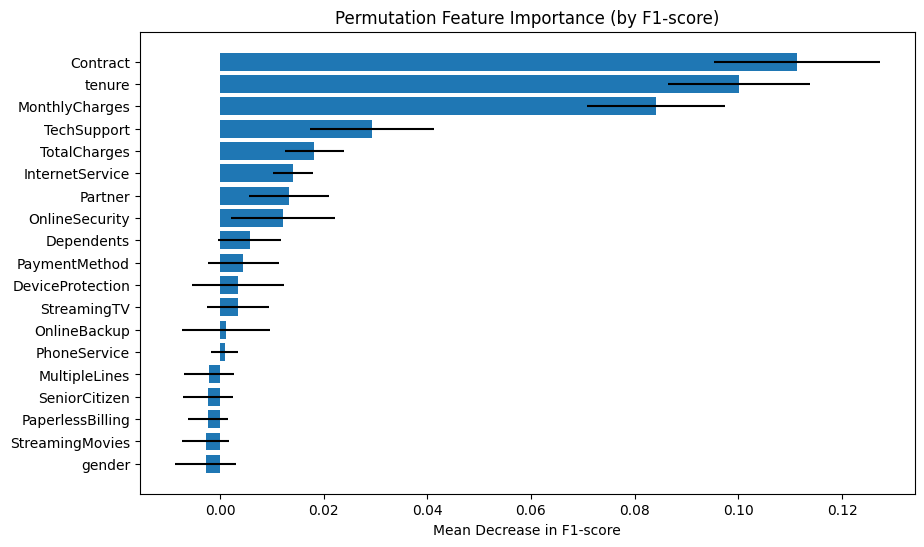

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

All_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure','PhoneService', 'MultipleLines', 
            'InternetService', 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 
            'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling','PaymentMethod','MonthlyCharges', 'TotalCharges']
# Get permutation importance
result = permutation_importance(Model_F_All_cols, X_test, y_test, scoring='f1', n_repeats=10, random_state=42)

# Convert to DataFrame
perm_importance = pd.DataFrame({
    'feature': All_cols,
    'importance_mean': result.importances_mean,
    'importance_std': result.importances_std
}).sort_values(by='importance_mean', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(perm_importance['feature'], perm_importance['importance_mean'], xerr=perm_importance['importance_std'])
plt.gca().invert_yaxis()
plt.title('Permutation Feature Importance (by F1-score)')
plt.xlabel('Mean Decrease in F1-score')
plt.show()


In [90]:
# Define features and target
selected_4 = [
    'TotalCharges', 'MonthlyCharges', 'tenure', 'Contract',
    'OnlineSecurity', 'TechSupport',
    'InternetService',
    'DeviceProtection', 'OnlineBackup',
]
target = 'Churn'

# Separate features ad target
X_train, y_train = train_df[selected_4], train_df[target]

# Apply SMOTE + Tomek separately to training and testing data
smote_tomek = SMOTETomek(random_state=42)

X_train_res, y_train_res = smote_tomek.fit_resample(X_train, y_train)

# Convert back to DataFrame
train1_4 = pd.DataFrame(X_train_res, columns=selected_4)
train1_4[target] = y_train_res

# Save the balanced dataset as a CSV file
train1_4.to_csv("./Data/balanced_train_4.csv", index=False)

print("Balanced train datasets for train1_4 saved successfully!")


Balanced train datasets for train1_4 saved successfully!


In [91]:
# Function to train and evaluate a model
def train_model(X_train, y_train, X_test , y_test):
    # Train a Random Forest model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Get probability scores instead of direct predictions
    y_probs = model.predict_proba(X_test)[:, 1]
    
    # Compute precision-recall curve
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
    
    # Find the best threshold for max F1-score
    f1_scores = (2 * precisions * recalls) / (precisions + recalls + 1e-9)  # Avoid division by zero
    best_threshold = thresholds[f1_scores.argmax()]
    
    print(f"Optimal Threshold for F1-score: {best_threshold:.4f}")
    
    # Apply new threshold
    y_pred_adjusted = (y_probs >= best_threshold).astype(int)
    
    # Evaluate
    print("Accuracy:", accuracy_score(y_test, y_pred_adjusted))
    print(confusion_matrix(y_test, y_pred_adjusted))
    print(classification_report(y_test, y_pred_adjusted))
    
    
    return model, best_threshold

# Define feature matrix
X_train = train1_4[selected_4]
y_train = train1_4['Churn']
X_test = test_df[selected_4]
y_test = test_df['Churn']

Model_F_selected_4, best_threshold = train_model(X_train, y_train, X_test , y_test)

Optimal Threshold for F1-score: 0.4200
Accuracy: 0.767590618336887
[[833 193]
 [134 247]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1026
           1       0.56      0.65      0.60       381

    accuracy                           0.77      1407
   macro avg       0.71      0.73      0.72      1407
weighted avg       0.78      0.77      0.77      1407



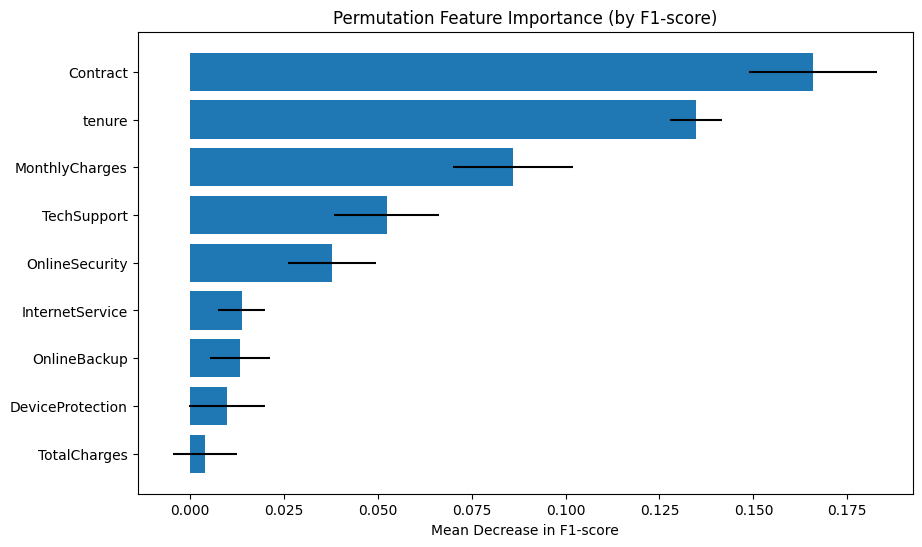

In [92]:
selected_4 = [
    'TotalCharges', 'MonthlyCharges', 'tenure', 'Contract',
    'OnlineSecurity', 'TechSupport',
    'InternetService',
    'DeviceProtection', 'OnlineBackup',
]
# Get permutation importance
result = permutation_importance(Model_F_selected_4, X_test, y_test, scoring='f1', n_repeats=10, random_state=42)

# Convert to DataFrame
perm_importance = pd.DataFrame({
    'feature': selected_4,
    'importance_mean': result.importances_mean,
    'importance_std': result.importances_std
}).sort_values(by='importance_mean', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(perm_importance['feature'], perm_importance['importance_mean'], xerr=perm_importance['importance_std'])
plt.gca().invert_yaxis()
plt.title('Permutation Feature Importance (by F1-score)')
plt.xlabel('Mean Decrease in F1-score')
plt.show()


In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

All_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
                    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup','DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 
                    'Contract','PaperlessBilling','PaymentMethod','MonthlyCharges', 'TotalCharges']

target_col = 'Churn'

X = df[All_cols]
y= df[target_col]

model = RandomForestClassifier()
model.fit(X, y)
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feature_importance)


TotalCharges        0.192697
MonthlyCharges      0.182865
tenure              0.154544
Contract            0.079943
PaymentMethod       0.050187
OnlineSecurity      0.045193
TechSupport         0.044753
OnlineBackup        0.027501
gender              0.027390
PaperlessBilling    0.025611
InternetService     0.023647
Partner             0.023412
MultipleLines       0.022142
DeviceProtection    0.021644
SeniorCitizen       0.020833
Dependents          0.018894
StreamingMovies     0.017411
StreamingTV         0.016357
PhoneService        0.004975
dtype: float64


In [103]:
X = df[All_cols]
y= df[target_col]

model = DecisionTreeClassifier()
model.fit(X, y)
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feature_importance)


TotalCharges        0.220245
MonthlyCharges      0.195435
Contract            0.169300
tenure              0.115105
OnlineSecurity      0.044738
PaymentMethod       0.037978
InternetService     0.028366
gender              0.027379
Dependents          0.019213
DeviceProtection    0.018715
PaperlessBilling    0.018506
MultipleLines       0.017261
TechSupport         0.017188
Partner             0.017115
SeniorCitizen       0.016434
OnlineBackup        0.013044
StreamingMovies     0.010716
StreamingTV         0.010311
PhoneService        0.002949
dtype: float64


In [104]:
X = df[All_cols]
y= df[target_col]

model = XGBClassifier()
model.fit(X, y)
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feature_importance)


Contract            0.353494
InternetService     0.201565
OnlineSecurity      0.082643
TechSupport         0.053388
PhoneService        0.035441
tenure              0.028316
StreamingMovies     0.024032
OnlineBackup        0.021447
PaperlessBilling    0.020852
MonthlyCharges      0.020414
SeniorCitizen       0.020016
TotalCharges        0.019654
MultipleLines       0.018994
PaymentMethod       0.018463
StreamingTV         0.018179
Dependents          0.017226
DeviceProtection    0.015635
gender              0.015471
Partner             0.014772
dtype: float32


In [106]:
# Define features and target
All_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure','PhoneService', 'MultipleLines', 
            'InternetService', 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 
            'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling','PaymentMethod','MonthlyCharges', 'TotalCharges']
target = 'Churn'

# Separate features ad target
X_train, y_train = train_df[All_cols], train_df[target]

# Apply SMOTE + Tomek separately to training and testing data
smote_tomek = SMOTETomek(random_state=42)

X_train_res, y_train_res = smote_tomek.fit_resample(X_train, y_train)

# Convert back to DataFrame
train1_All_cols = pd.DataFrame(X_train_res, columns=All_cols)
train1_All_cols[target] = y_train_res

# Save the balanced dataset as a CSV file
train1_All_cols.to_csv("./Data/balanced_train_All_cols.csv", index=False)

print("Balanced train datasets for train1_All_cols saved successfully!")


Balanced train datasets for train1_All_cols saved successfully!


In [107]:
# Function to train and evaluate a model
def train_model(X_train, y_train, X_test , y_test):
    # Train a Random Forest model
    model = XGBClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Get probability scores instead of direct predictions
    y_probs = model.predict_proba(X_test)[:, 1]
    
    # Compute precision-recall curve
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
    
    # Find the best threshold for max F1-score
    f1_scores = (2 * precisions * recalls) / (precisions + recalls + 1e-9)  # Avoid division by zero
    best_threshold = thresholds[f1_scores.argmax()]
    
    print(f"Optimal Threshold for F1-score: {best_threshold:.4f}")
    
    # Apply new threshold
    y_pred_adjusted = (y_probs >= best_threshold).astype(int)
    
    # Evaluate
    print("Accuracy:", accuracy_score(y_test, y_pred_adjusted))
    print(confusion_matrix(y_test, y_pred_adjusted))
    print(classification_report(y_test, y_pred_adjusted))
    
    
    return model, best_threshold

# Define feature matrix
X_train = train1_All_cols[All_cols]
y_train = train1_All_cols['Churn']
X_test = test_df[All_cols]
y_test = test_df['Churn']

Model_F_All_cols, best_threshold = train_model(X_train, y_train, X_test , y_test)

Optimal Threshold for F1-score: 0.1910
Accuracy: 0.7405828002842928
[[743 283]
 [ 82 299]]
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1026
           1       0.51      0.78      0.62       381

    accuracy                           0.74      1407
   macro avg       0.71      0.75      0.71      1407
weighted avg       0.80      0.74      0.75      1407



In [110]:
# Function to train and evaluate a model
def train_model(X_train, y_train, X_test , y_test):
    # Train a Random Forest model
    model = DecisionTreeClassifier( random_state=42)
    model.fit(X_train, y_train)
    
    # Get probability scores instead of direct predictions
    y_probs = model.predict_proba(X_test)[:, 1]
    
    # Compute precision-recall curve
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
    
    # Find the best threshold for max F1-score
    f1_scores = (2 * precisions * recalls) / (precisions + recalls + 1e-9)  # Avoid division by zero
    best_threshold = thresholds[f1_scores.argmax()]
    
    print(f"Optimal Threshold for F1-score: {best_threshold:.4f}")
    
    # Apply new threshold
    y_pred_adjusted = (y_probs >= best_threshold).astype(int)
    
    # Evaluate
    print("Accuracy:", accuracy_score(y_test, y_pred_adjusted))
    print(confusion_matrix(y_test, y_pred_adjusted))
    print(classification_report(y_test, y_pred_adjusted))
    
    
    return model, best_threshold

# Define feature matrix
X_train = train1_All_cols[All_cols]
y_train = train1_All_cols['Churn']
X_test = test_df[All_cols]
y_test = test_df['Churn']

Model_F_All_cols, best_threshold = train_model(X_train, y_train, X_test , y_test)

Optimal Threshold for F1-score: 1.0000
Accuracy: 0.7391613361762616
[[829 197]
 [170 211]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1026
           1       0.52      0.55      0.53       381

    accuracy                           0.74      1407
   macro avg       0.67      0.68      0.68      1407
weighted avg       0.75      0.74      0.74      1407

